In [1]:
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import biht as biht

# Download and prepare MNIST dataset

In [2]:
# Download and load MNIST dataset
dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())

# Convert training data to NumPy arrays
images = np.array([np.array(img[0]) for img in dataset]).squeeze()  # Extract images
labels = np.array([img[1] for img in dataset]).squeeze()  # Extract labels

# Reshape images to vectors
num, rows, cols = images.shape


flattened_images = images.reshape(num, rows*cols)


# Generate Sensing Matrices

In [3]:
# List of row sizes for the projection matrices
rows_list = [25, 100, 200, 500]
cols = 784  # Image vector dimension

# Generate random matrices and normalize columns
projection_matrices = []
for rows in rows_list:
    W = np.random.randn(rows, cols)  # Draw from standard normal distribution
    W /= np.linalg.norm(W, axis=0, keepdims=True)  # Normalize columns to unit L2 norm
    projection_matrices.append(W)


# Regularizer-class algorithms
The measurements are compactly expressed using :
$$
\mathbf{y} = sign(\Phi \mathbf{x})
$$
It follows that we have this equality :
$$
\text{diag}(\mathbf{y})\Phi \mathbf{x} = Y\Phi \mathbf{x} \geq 0
$$
For the minimization to not drive $\mathbf{x}$ to $0$ we need to add the following constraint :
$$
||\mathbf{x}||_2 = (\sum_i x_i^2)^{1/2} =1 
$$

Relaxed version of the problem :
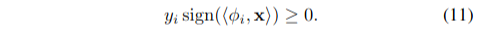
$$
\begin{align}
\hat{\mathbf{x}} = \argmin_\mathbf{x} ||\mathbf{x}||_1 + \lambda \sum_i f((Y(\mathbf{y})\Phi \mathbf{x})_i) \\
st\quad ||\mathbf{x}||_2 = 2
\end{align}
$$

Note that $(Y\Phi \mathbf{x})_i = y_i\text{sign}(\phi_i \cdot \mathbf{x})$

In Boufonos, $f$ is chosen as :
$$
f(x) = 
\begin{cases}
    \frac{x^2}{2},&x<0 \\
    0,& x \geq 0
\end{cases}

#  Binary Iterative Hard Thresholding (BIHT) algorithm for 1-bit compressed sensing.

In [12]:
# Project the images onto the matrices and 
projected_images = [np.sign(Phi @ flattened_images.T) for Phi in projection_matrices]  # Shape: (rows, num_samples)


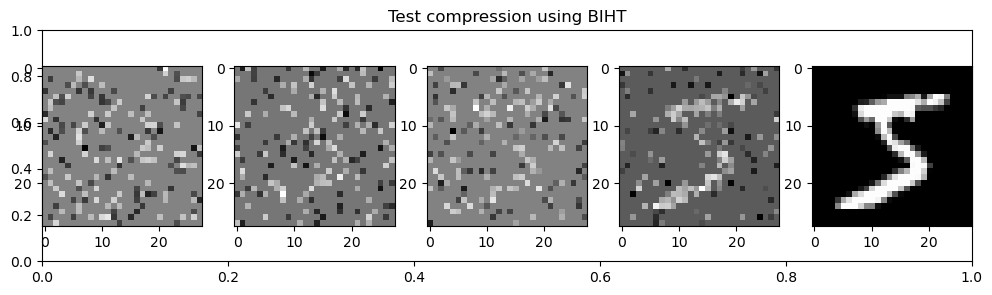

In [33]:
image = images[0,:,:]
flattened_image = flattened_images[0,:]
plt.figure(figsize=(12,3))
plt.title("Test compression using BIHT")

for idx, Phi in enumerate(projection_matrices):
    K = np.count_nonzero(flattened_image)
    y = np.sign(Phi@flattened_image)
    x, stats = biht.binary_iterative_hard_thresholding(Phi, y, K)
    recon_image = x.reshape(28, 28)
    plt.subplot(1, 5, idx+1)
    plt.imshow(recon_image,cmap='gray')

plt.subplot(1,5,5)
plt.imshow(image, cmap='gray')
